# Exploratory Data Analysis

## Most Common Words 


After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at make sense. Before applying any fancy algorithms,it's always important to explore the data first.
When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before indetifying the hidden patterns with machines learning techniques. We are going to look at the following for each writer.
1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words.
3. **Amount of profanity** - most common terms

### Analysis 

In [1]:
import pandas as pd
 
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Ernest Hemingway,Joseph Conrad,Vladimir Nabokov
abilities,0,0,1
ability,1,0,0
able,4,0,0
abnormal,0,0,1
aboriginal,0,1,0


In [12]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    #Most common words
    top_dict[c] = list(zip(top.index,top.values))
#top_dict

In [9]:
for writer, top_words in top_dict.items():
    print(writer)
    print(', '.join([word for word,i in top_words[0:14]]),'\n')   ###### Top 14 frequent words ######

Ernest Hemingway
hemingway, hemingways, novel, war, years, time, farewell, version, arms, catherine, henry, priest, rain, love 

Joseph Conrad
darkness, heart, dark, narrator, life, kind, adams, title, group, narrative, conrad, story, men, opening 

Vladimir Nabokov
nabokov, lolita, book, russian, nabokovs, english, vladimir, years, time, man, write, french, professor, world 



In [11]:
#top_dict

In [16]:
from collections import Counter
words = []
for writer in data.columns:
 #   print(writer)
    top = [word for (word,count) in top_dict[writer]]
    #print(top)
    for t in top:
        words.append(t)
words

['hemingway',
 'hemingways',
 'novel',
 'war',
 'years',
 'time',
 'farewell',
 'version',
 'arms',
 'catherine',
 'henry',
 'priest',
 'rain',
 'love',
 'second',
 'tell',
 'nurse',
 'world',
 'young',
 'story',
 'says',
 'life',
 'fiction',
 'american',
 'conclusion',
 'great',
 'words',
 'use',
 'just',
 'book',
 'darkness',
 'heart',
 'dark',
 'narrator',
 'life',
 'kind',
 'adams',
 'title',
 'group',
 'narrative',
 'conrad',
 'story',
 'men',
 'opening',
 'fact',
 'richard',
 'man',
 'marlow',
 'reader',
 'director',
 'focus',
 'evil',
 'english',
 'text',
 'ideas',
 'sea',
 'tale',
 'associations',
 'images',
 'meanings',
 'nabokov',
 'lolita',
 'book',
 'russian',
 'nabokovs',
 'english',
 'vladimir',
 'years',
 'time',
 'man',
 'write',
 'french',
 'professor',
 'world',
 'life',
 'published',
 'love',
 'little',
 'said',
 'wife',
 'novel',
 'paris',
 'new',
 'like',
 'hollywood',
 'university',
 'cornell',
 'copies',
 'wrote',
 'house']

In [17]:
# Let's aggregate this list and identify the most overlap common words along with how many routines they occur in
Counter(words).most_common()

[('life', 3),
 ('novel', 2),
 ('years', 2),
 ('time', 2),
 ('love', 2),
 ('world', 2),
 ('story', 2),
 ('book', 2),
 ('man', 2),
 ('english', 2),
 ('hemingway', 1),
 ('hemingways', 1),
 ('war', 1),
 ('farewell', 1),
 ('version', 1),
 ('arms', 1),
 ('catherine', 1),
 ('henry', 1),
 ('priest', 1),
 ('rain', 1),
 ('second', 1),
 ('tell', 1),
 ('nurse', 1),
 ('young', 1),
 ('says', 1),
 ('fiction', 1),
 ('american', 1),
 ('conclusion', 1),
 ('great', 1),
 ('words', 1),
 ('use', 1),
 ('just', 1),
 ('darkness', 1),
 ('heart', 1),
 ('dark', 1),
 ('narrator', 1),
 ('kind', 1),
 ('adams', 1),
 ('title', 1),
 ('group', 1),
 ('narrative', 1),
 ('conrad', 1),
 ('men', 1),
 ('opening', 1),
 ('fact', 1),
 ('richard', 1),
 ('marlow', 1),
 ('reader', 1),
 ('director', 1),
 ('focus', 1),
 ('evil', 1),
 ('text', 1),
 ('ideas', 1),
 ('sea', 1),
 ('tale', 1),
 ('associations', 1),
 ('images', 1),
 ('meanings', 1),
 ('nabokov', 1),
 ('lolita', 1),
 ('russian', 1),
 ('nabokovs', 1),
 ('vladimir', 1),
 ('wri

In [18]:
add_stop_words = ['nabokov','nabokovs','vladimir','hemingways','hemingway','book','novel']
add_stop_words

['nabokov', 'nabokovs', 'vladimir', 'hemingways', 'hemingway', 'book', 'novel']

In [19]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
data_clean = pd.read_pickle('data_clean.pkl')
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
######### Add new stop words by union ######
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_stop.index = data_clean.index

import pickle
pickle.dump(cv,open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [20]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color="white",
              colormap="Dark2",max_font_size=150,random_state=42)

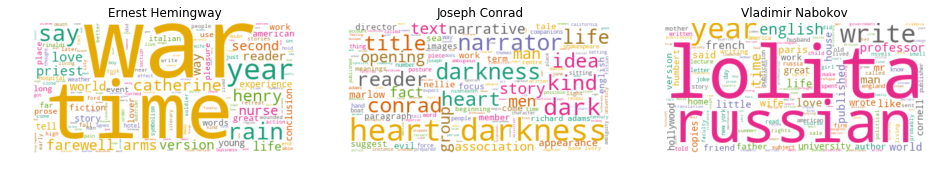

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,6]
full_names = ['Ernest Hemingway','Joseph Conrad','Vladimir Nabokov']
for index, writer in enumerate(data.columns):
    wc.generate(data_clean.transcript[writer])
    plt.subplot(1,3,index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [26]:
unique_list = []
for writer in data.columns:
    uniques = data[writer].nonzero()[0].size
    unique_list.append(uniques)
data_words = pd.DataFrame(list(zip(full_names,unique_list)), columns=['writer','unique_words'])
data_words

,writer,unique_words
0,Ernest Hemingway,1334
1,Joseph Conrad,748
2,Vladimir Nabokov,1626


In [27]:
unique_list

[1334, 748, 1626]

In [28]:
total_list = []
for writer in data.columns:
    totals = sum(data[writer])
    total_list.append(totals)
data_words['total_words'] = total_list
#    print(total_list)
data_words['percentage'] = data_words['unique_words'] / data_words['total_words']

In [29]:
data_words

,writer,unique_words,total_words,percentage
0,Ernest Hemingway,1334,2196,0.607468
1,Joseph Conrad,748,1037,0.721311
2,Vladimir Nabokov,1626,2478,0.656174


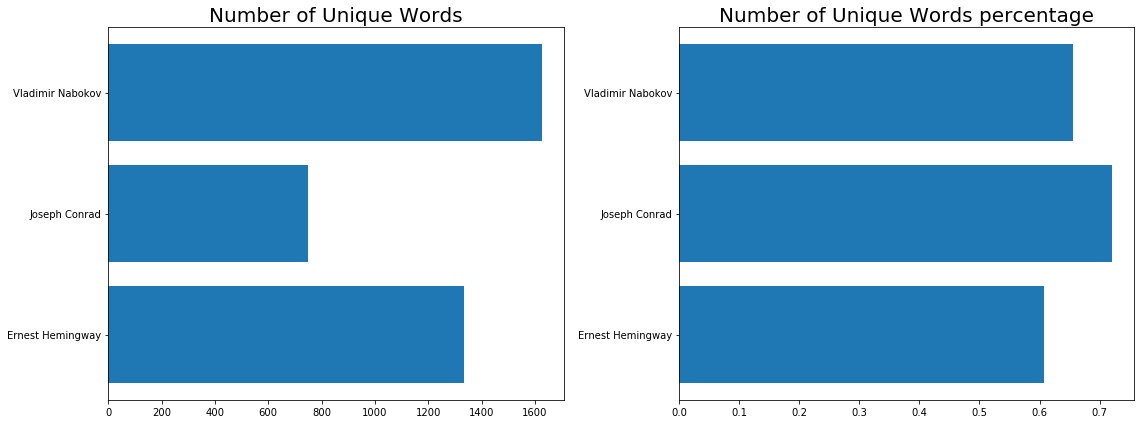

In [30]:
import numpy as np
y_pos = np.arange(len(data_words))

plt.subplot(1,2,1)
plt.barh(y_pos,data_words.unique_words,align='center')
plt.yticks(y_pos, data_words.writer)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1,2,2)
plt.barh(y_pos,data_words.percentage,align='center')
plt.yticks(y_pos, data_words.writer)
plt.title('Number of Unique Words percentage', fontsize=20)

plt.tight_layout()
plt.show()